In [1]:
import pandas as pd
import numpy as np
import my_net as mn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
rings_train = pd.read_csv("../data/classification/rings3-regular-training.csv")
rings_test = pd.read_csv("../data/classification/rings3-regular-test.csv")
easy_train = pd.read_csv("../data/classification/easy-training.csv")
easy_test = pd.read_csv("../data/classification/easy-test.csv")
xor_train = pd.read_csv("../data/classification/xor3-training.csv")
xor_test = pd.read_csv("../data/classification/xor3-test.csv")
easy_train["c"] = easy_train["c"].astype("int")
easy_test["c"] = easy_test["c"].astype("int")

rings_train_X = rings_train[["x", "y"]].values
rings_test_X = rings_test[["x", "y"]].values
rings_train_Y = rings_train[["c"]].values
rings_test_Y = rings_test[["c"]].values

easy_train_X = easy_train[["x", "y"]].values
easy_test_X = easy_test[["x", "y"]].values
easy_train_Y = easy_train[["c"]].values
easy_test_Y = easy_test[["c"]].values

xor_train_X = xor_train[["x", "y"]].values
xor_test_X = xor_test[["x", "y"]].values
xor_train_Y = xor_train[["c"]].values
xor_test_Y = xor_test[["c"]].values

In [3]:
encoder = OneHotEncoder(handle_unknown='ignore')
rings_train_Y_oh = encoder.fit_transform(rings_train[['c']]).toarray()
rings_test_Y_oh = encoder.fit_transform(rings_test[['c']]).toarray()

easy_train_Y_oh = encoder.fit_transform(easy_train[['c']]).toarray()
easy_test_Y_oh = encoder.fit_transform(easy_test[['c']]).toarray()

xor_train_Y_oh = encoder.fit_transform(xor_train[['c']]).toarray()
xor_test_Y_oh = encoder.fit_transform(xor_test[['c']]).toarray()

In [4]:
np.random.seed(21)

# easy

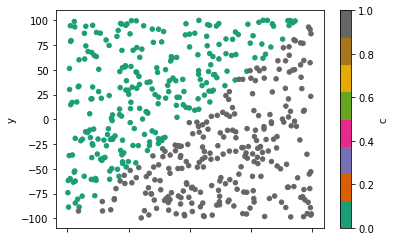

In [5]:
easy_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")

In [12]:
def softmax(a):
    expa = np.exp(a - np.max(a))
    return expa / expa.sum(axis=0, keepdims=True)
def softmax_prim(a):
    return softmax(a) * (1 - softmax(a))

In [13]:
softmax(np.array([1, 0, 0, 0])), softmax_prim(np.array([1, 0, 0, 0]))

(array([0.47536689, 0.1748777 , 0.1748777 , 0.1748777 ]),
 array([0.24939321, 0.14429549, 0.14429549, 0.14429549]))

In [17]:
net = mn.Net(2)
net.add(mn.DenseLayer(25, "sigmoid"))
net.add(mn.DenseLayer(2, "softmax"))
#net.add(mn.DenseLayer(2, "identity"))
net.kernel_init("xavier")

In [18]:
net.predict(easy_train_X)

array([[0.00077907, 0.00145698],
       [0.00137471, 0.00202782],
       [0.0014095 , 0.001935  ],
       [0.00081097, 0.00125904],
       [0.00066415, 0.00147811],
       [0.00072571, 0.00151153],
       [0.0010187 , 0.0010054 ],
       [0.00139177, 0.00190318],
       [0.00102705, 0.00069809],
       [0.00102708, 0.00069819],
       [0.00209449, 0.00133606],
       [0.00190513, 0.00125454],
       [0.00066739, 0.00147031],
       [0.00065675, 0.0015458 ],
       [0.00207912, 0.00134651],
       [0.00217172, 0.00139191],
       [0.00159934, 0.00118089],
       [0.00185644, 0.00131983],
       [0.0017424 , 0.00224496],
       [0.00130872, 0.00196414],
       [0.00099589, 0.00072427],
       [0.00143106, 0.00188941],
       [0.00065722, 0.0015535 ],
       [0.00145774, 0.0018186 ],
       [0.00081552, 0.00144371],
       [0.00155033, 0.00220716],
       [0.00077934, 0.00141169],
       [0.0007155 , 0.00134194],
       [0.00071761, 0.00151356],
       [0.00066868, 0.00146777],
       [0.

In [16]:
easy_train_Y_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [8]:
mse, iters, mses_history = net.backpropagate(easy_train_X, easy_train_Y_oh, 
                               eta=1, n_epochs=3000,
                               required_loss=0, raporting_loss="cross-entropy",
                               verbose=3,
                               validation_input=easy_test_X, 
                               validation_output=easy_test_Y_oh, 
                               normalization_method=None
                              )


[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]


[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]


[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]


[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
cross-entropy after 3500 iterations (epoch 6): 13574.107252123635
Absolute weights sum on 3500 iteration (epoch 7): 
3.34, 
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0

KeyboardInterrupt: 

# xor

In [ ]:
xor_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")

# rings

In [ ]:
rings_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")
